In [1]:
# Import libraries and load dataset
import os
import sys
import importlib
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

import common.common as common
importlib.reload(common)

df = pd.read_csv("Data.csv")

yr = list(df.yr)
df = df.set_index("yr")
df["yr"] = yr
df

,inbtou_volume_cruise,covid19_cases,covid19_deaths,covid19_mortality,yr
yr,,,,,
2010,NaN,0,0,0.000000,2010
2011,NaN,0,0,0.000000,2011
2012,1752000.0,0,0,0.000000,2012
2013,1786000.0,0,0,0.000000,2013
2014,2002000.0,0,0,0.000000,2014
2015,1902000.0,0,0,0.000000,2015
2016,1669000.0,0,0,0.000000,2016
2017,1238000.0,0,0,0.000000,2017
2018,1597000.0,0,0,0.000000,2018


Estimated COVID-19 effect: -1092669 ± 216712 (95% confidence)


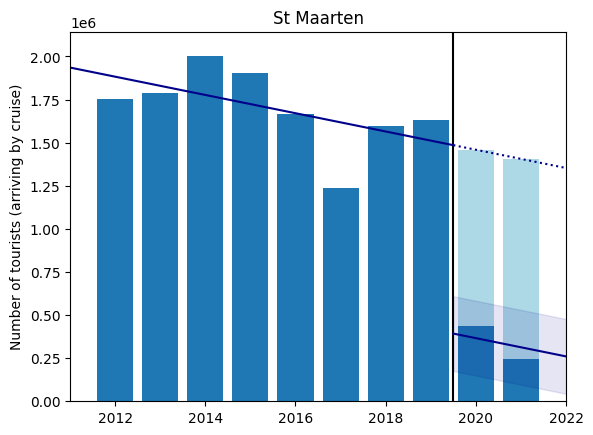

                               OLS Regression Results                               
Dep. Variable:     log_inbtou_volume_cruise   R-squared:                       0.977
Model:                                  OLS   Adj. R-squared:                  0.965
Method:                       Least Squares   F-statistic:                     84.41
Date:                      Wed, 26 Apr 2023   Prob (F-statistic):           2.69e-05
Time:                              15:51:10   Log-Likelihood:                 8.4902
No. Observations:                        10   AIC:                            -8.980
Df Residuals:                             6   BIC:                            -7.770
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [6]:
# Set up plot
plt.title('St Maarten')
plt.ylabel('Number of tourists (arriving by cruise)')
plt.xlim(2011, 2022)
y_name = 'inbtou_volume_cruise'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)